### Análisis exploratorio de datos (EDA)

EDA, es una etapa crucial en la cual se busca comprender la estructura y descubrir patrones en los datos, así como las relaciones entre variables.

En este caso, vamos a explorar el conjunto de datos llamado cleaned_dataset. 

Durante esta fase, utilizaremos diferentes visualizaciones y técnicas para identificar tendencias y extraer información valiosa.

#### Importar librerías

In [11]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código.
from scipy.stats import mode #Biblioteca de Python para matemáticas, ciencia e ingeniería
from wordcloud import WordCloud #Biblioteca para crear nubes de palabras en Python
from collections import Counter #Es una clase que facilita el conteo de elementos en una colección

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

#### Cargar y visializar los datos.

In [13]:
cars = pd.read_csv('cleaned_dataset.csv')  # Cargar los datos
print("* Los datos fueron cargados correctamente.")
print("- - " * 11)
# Mostrar los primeros 5 registros del dataframe
print("* Primeros 5 registros del dataset:")
cars.head()

* Los datos fueron cargados correctamente.
- - - - - - - - - - - - - - - - - - - - - - 
* Primeros 5 registros del dataset:


,car_id,marca,modelo,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,clasificacion_precio,calificacion_riesgo
0,1,alfa romeo,giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,0,Extremadamente Riesgoso
1,2,alfa romeo,stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,0,Extremadamente Riesgoso
2,3,alfa romeo,quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,Riesgoso
3,4,audi,a6,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,0,Muy Riesgoso
4,5,audi,a6,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,Muy Riesgoso


#### Distribución estadística de las variables numéricas

In [14]:
print("* Descripción estadística de las columnas numéricas de un DataFrame.")
print(cars.describe())

* Descripción estadística de las columnas numéricas de un DataFrame.
           car_id  door_number  wheel_base  car_length   car_width  \
count  205.000000   205.000000  205.000000  205.000000  205.000000   
mean   103.000000     3.121951   98.756585  174.049268   65.907805   
std     59.322565     0.994966    6.021776   12.337289    2.145204   
min      1.000000     2.000000   86.600000  141.100000   60.300000   
25%     52.000000     2.000000   94.500000  166.300000   64.100000   
50%    103.000000     4.000000   97.000000  173.200000   65.500000   
75%    154.000000     4.000000  102.400000  183.100000   66.900000   
max    205.000000     4.000000  120.900000  208.100000   72.300000   

       car_height  curb_weight  cylinder_number  engine_size  bore_ratio  \
count  205.000000   205.000000       205.000000   205.000000  205.000000   
mean    53.724878  2555.565854         4.419512   126.907317    3.329756   
std      2.443522   520.680204         1.441544    41.642693    0.270844

#### Histogramas de variables numéricas

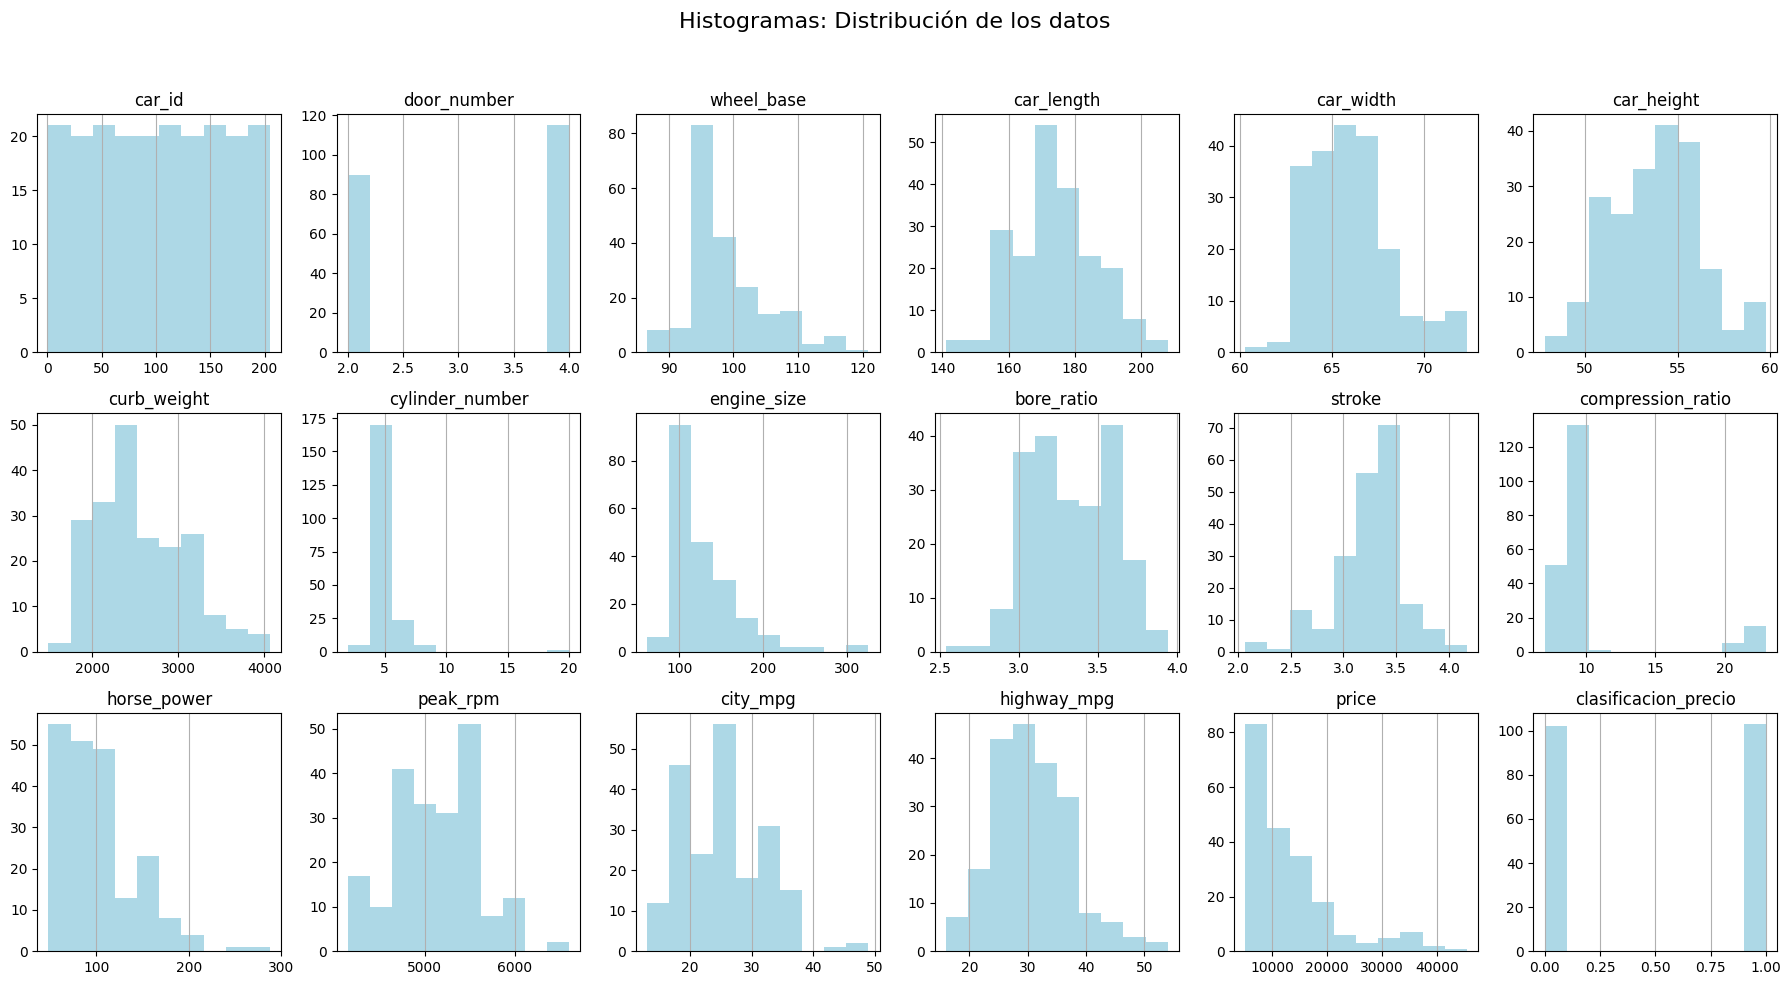

In [15]:
# Define la figura y los ejes para subgráficos
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
fig.suptitle("Histogramas: Distribución de los datos", fontsize=16)

# Itera sobre las columnas numéricas y crea histogramas en los subgráficos correspondientes
for i, (col, ax) in enumerate(zip(cars.select_dtypes(include=np.number).columns, axes.flatten())):
    cars[col].hist(ax=ax, bins=10, color='lightblue')
    ax.set_title(col)
    ax.yaxis.grid(False)  # Desactiva las líneas horizontales de la cuadrícula en el eje y

# Ajusta la disposición
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta rect para dejar espacio para el título
plt.show()

Al observar los histogramas de las variables numéricas, puedo hacer algunas observaciones que serán útiles para el entrenamiento de los modelos:

1. **Distribuciones sesgadas**: La mayoría de las variables numéricas, como **engine_size**, **horse_power**, **price**, y **compression_ratio**, presentan distribuciones sesgadas hacia la izquierda (sesgo positivo), lo que podría afectar el desempeño de algunos modelos. Consideraré aplicar transformaciones como **logaritmos** o **box-cox** para corregir el sesgo.

2. **Rangos amplios de valores**: Variables como **price**, **curb_weight**, y **engine_size** tienen rangos amplios de valores. Esto sugiere la necesidad de **escalar los datos** (normalización o estandarización) para que los modelos que se basan en distancias (por ejemplo, KNN o SVM) no se vean afectados por las magnitudes.

3. **Valores atípicos**: Algunas variables, como **compression_ratio** y **engine_size**, muestran posibles valores atípicos en los extremos. Estos valores podrían influir desproporcionadamente en los modelos, por lo que podría ser necesario tratarlos, bien sea **eliminándolos** o **ajustando los modelos** para que sean más robustos a ellos.

4. **Distribución uniforme en algunos casos**: Variables como **wheel_base** y **bore_ratio** presentan distribuciones más uniformes, lo que puede ser beneficioso para algunos modelos, pero aún así será importante revisarlas durante el entrenamiento.

Al tener en cuenta estas observaciones, podré decidir mejor sobre qué técnicas de preprocesamiento aplicar antes de entrenar los modelos y así asegurar que los datos estén correctamente ajustados para obtener buenos resultados en el análisis final.

#### Distribución de Variables Categóricas

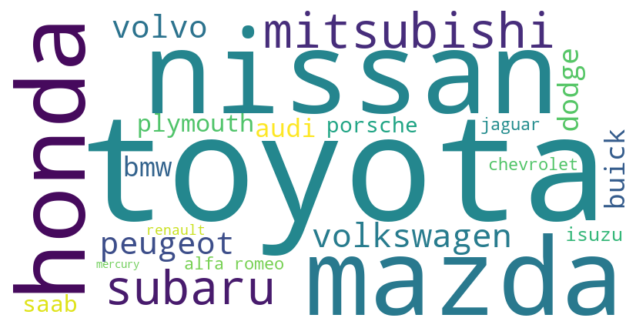

In [16]:
# Contar la frecuencia de cada marca
marca_counts = Counter(cars['marca'].astype(str).tolist())  # Convierte a string para evitar problemas con valores numéricos

# Crear una función para generar nubes de palabras con frecuencia
def generate_wordcloud_with_frequency(text_counts): # Crea la nube de palabras usando las frecuencias proporcionadas
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text_counts)
    
     # Mostrar la nube de palabras
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la visualización
    plt.imshow(wordcloud, interpolation='bilinear')  # Muestra la imagen
    plt.axis('off')  # Desactiva los ejes para una mejor presentación
    plt.show()

# Generar nube de palabras para la columna 'marca'
generate_wordcloud_with_frequency(marca_counts)

En la nube de palabras, las marcas más relevantes son: Toyota, Nissan, Mazda y Honda.

#### Gráficos de barras de distribución variables categóricas del conjunto de datos.

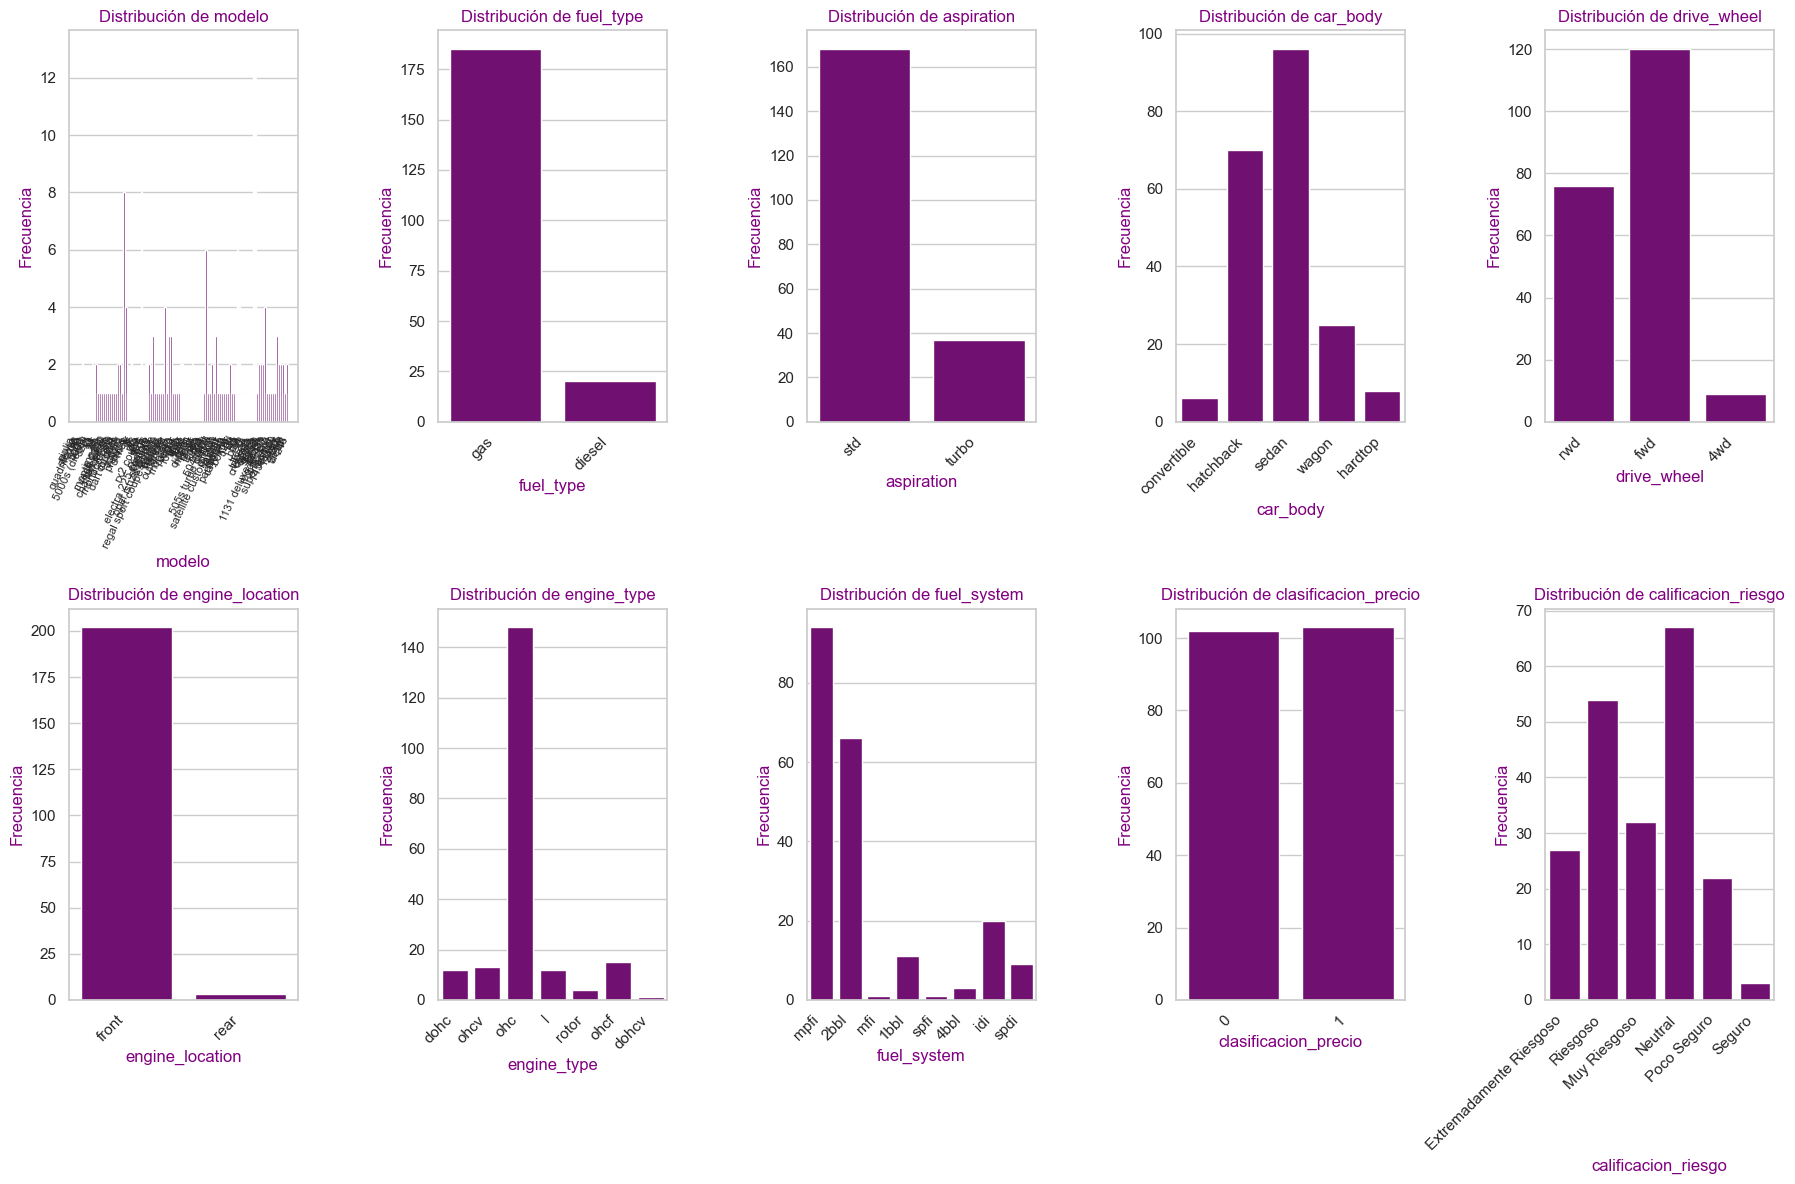

In [17]:
# Establecer el color principal con código hexadecimal para púrpura
color_principal = '#800080'  # Púrpura

# Lista de variables categóricas que deseas visualizar
variables_categoricas = ['modelo', 'fuel_type', 'aspiration', 'car_body', 
                         'drive_wheel', 'engine_location', 'engine_type',
                         'fuel_system', 'clasificacion_precio', 'calificacion_riesgo']

# Establecer el fondo de los gráficos
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(18, 12))  # Aumenta tamaño total para más espacio

# Iterar sobre las variables categóricas y generar gráficos
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(2, 5, i)  # Subgráficos en 2 filas y 5 columnas
    
    # Ajustes específicos para el primer gráfico (modelo)
    if variable == 'modelo':
        sns.countplot(x=variable, data=cars, color=color_principal)
        plt.title(f'Distribución de {variable}', color=color_principal)
        plt.xlabel(variable, color=color_principal)
        plt.ylabel('Frecuencia', color=color_principal)
        plt.xticks(rotation=65, ha='right', fontsize=8)  # Rotación y tamaño más pequeño para el primer gráfico
        plt.gca().margins(x=0.03)  # Aumentar margen horizontal para evitar que se corten las etiquetas
    else:
        sns.countplot(x=variable, data=cars, color=color_principal)
        plt.title(f'Distribución de {variable}', color=color_principal)
        plt.xlabel(variable, color=color_principal)
        plt.ylabel('Frecuencia', color=color_principal)
        plt.xticks(rotation=45, ha='right')  # Mantener rotación normal en otros gráficos

# Ajustar el espacio entre gráficos para evitar que se solapen
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Más espacio vertical entre gráficos

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()


Después de analizar los gráficos de las variables categóricas, puedo hacer las siguientes observaciones que serán relevantes para el entrenamiento de los modelos:

1. **Desbalance de clases**: Algunas variables, como **fuel_type**, **engine_location** y **clasificación_precio**, están desbalanceadas. Esto podría afectar el rendimiento del modelo, por lo que consideraré técnicas como el **balanceo de clases** (sobremuestreo o submuestreo) o ajustar las métricas de evaluación.

2. **Categorías con baja frecuencia**: Variables como **modelo**, **engine_type** y **fuel_system** tienen categorías con muy pocos datos. Esto puede generar ruido en los modelos, por lo que evaluaré la posibilidad de **agrupar estas categorías** o aplicar técnicas como **target encoding** para evitar la alta dimensionalidad.

3. **Muchas categorías en algunas variables**: Algunas variables, como **modelo**, tienen un número elevado de categorías, lo que podría complicar el entrenamiento si uso técnicas como **One-Hot Encoding**. Consideraré formas alternativas de codificación para evitar la explosión de características.

4. **Interacciones potenciales**: Algunas variables, como **drive_wheel** y **car_body**, podrían tener interacciones importantes que influirán en las predicciones. Usaré modelos que puedan capturar estas interacciones, como los **árboles de decisión** o **random forests**.

Estas observaciones me ayudarán a tomar decisiones más informadas a la hora de preprocesar los datos y seleccionar los modelos adecuados para obtener mejores resultados.

#### Primer modelo

Uno de los objetivos es desarrollar un modelo predictivo de clasificación para distinguir entre automóviles de gama alta y baja, utilizando la mediana del precio como punto de corte. 

Este enfoque me permitirá segmentar el mercado de manera efectiva y comprender mejor las características que definen a cada categoría.

#### Definir el punto de corte con la mediana del precio

Vamos a crear una nueva columna que clasifique los automóviles en "gama alta" y "gama baja", utilizando la mediana del precio como criterio de corte.

In [19]:
# Calcular la mediana del precio
mediana_precio = cars['price'].median()

# Crear una nueva columna 'clasificacion_precio' donde 1 es gama alta y 0 es gama baja
cars['clasificacion_precio'] = (cars['price'] > mediana_precio).astype(int)

# Verificar los primeros valores para asegurarnos de que la columna se ha creado correctamente
print(cars[['price', 'clasificacion_precio']].head())


   price  clasificacion_precio
0  13495                     1
1  16500                     1
2  16500                     1
3  13950                     1
4  17450                     1


#### Resumen de estadística descriptiva

In [4]:
print("* El Resumen de estadística descriptiva es:")
cars['price'].describe()

* El Resumen de estadística descriptiva es:


count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64